# CONTENTS

The book "Automata and Computability: A Programmer's Perspective" is abbreviated as [ACPP][acppamazon].
* Learn about Jupyter notebooks

* Learn about the Jupyter notebook markdown language

   - NOTE: This is not the same as the "automd" or "Automaton Markdown" that is part of Jove
   
   - Automd will be introduced beginning Chapter 4
   
   - Automd has many sub-languages
   
     * Chapters 4-6 : automd for DFA
     * Chapter 7 : automd for NFA
     * Chapter 8 : our regular expression syntax
     * Chapter 12 : automd for pushdown automata (PDA)
     * Chapter 13 : automd for Turing machines (TM)
    
* Learn the basics of Python-3

* Hear the author speak about computability on Youtube

    - Read about some practical motivations concerning parsing

* Experiment with Diophantine Equations (Chapter 1)

* Begin studying Languages (Chapters 2 and 3)

[acppamazon]:https://www.amazon.com/Automata-Computability-Programmers-Ganesh-Gopalakrishnan/dp/1138552429

#  Learn about the Jupyter notebook markdown language

The way to learn this material is to first learn Jupyter, thanks to a __fantastic__ tutorial by Corey Schafer. This Youtube video is brilliant - please watch it and practice what it teaches you.

<span style="color:blue"> **Youtube Video Tutorial of Jupyter** </span>

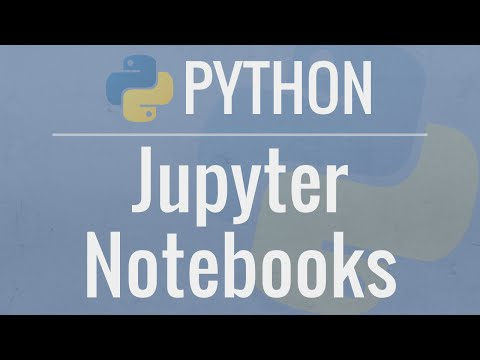

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('HW29067qVWk')

#  Learn about the Jupyter notebook markdown language

Also if you'd like a tutorial on Markdown (to add your own notes), here is a [quick overview](http://harishv.me/blog/What-is-Markdown), [here is a nice interactive tutorial](http://www.markdowntutorial.com), and [here is a quick reference](http://commonmark.org/help/).


Here are some handy commands for use in the rest of these Jupyter notes.

<b> - Bold text </b>

<strong> - Important text </strong>

<i> - Italic text </i>

<em> - Emphasized text </em>

<mark> - Marked text </mark>

<small> - Small text </small>

<del> - Deleted text </del>

<ins> - Inserted text </ins>

<sub> - Subscript text </sub>

<sup> - Superscript text </sup>

 <span style="color:blue"> ** typeset something in blue with emphasis added ** </span>
 
 <font size="4"> 
    
    <p>

<br>

<br>

Here is how to add spacing and paragraphs

<p>

<br>


<br>



<p>

 <font size="5"> 

Here is how you control your font size

</font>

# Learn the basics of Python-3

Jove is written using Python-3, and we assume that you have installed Python-3 (hereafter known as Python).
(In fact, Python-2 support is to end in 2020, as suggested by [this article][p2end]

We will assume that you can self-study some Python if you don't know the language already. We will
employ only a very small subset of Python. An [excellent Python tutorial is available][expython]. 

Appendix B of ACPP provides a list of Jove functions, and you may begin studying enough Python to
understand these functions.

[expython]:https://www.python-course.eu

[p2end]: https://legacy.python.org/dev/peps/pep-0373/

# Hear the author speak about computability on Youtube

The word **computability** captures what can be achieved using a computer, ie *what is the true power of a computer?* (forgetting how long it takes to compute something; just the possibility of exhibiting an answer or implementing a clever algorithm). In that sense, you can study computability even on a simple device such as a Turing machine. Here is a **fantastic** Turing machine built by Mike Davey!

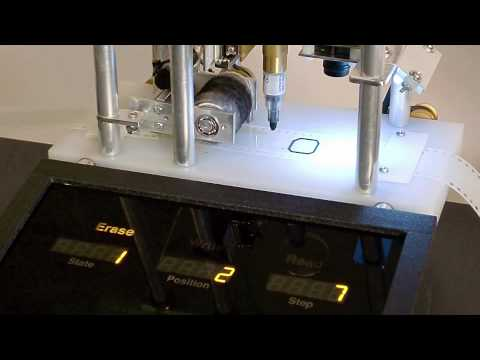

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('E3keLeMwfHY')

OK so the subject of computability theory attempts to answer what can be computed on such a primitive device. It has already shown (in the 1930s) that anything that such a device can do is all we can build and sell in the form of a computer (a laptop, an iPad, a server, and even a supercomputer are faster forms of the above device!)

Please read Chapter 1 of my book now. Here is a video that I recorded to help you follow along Chapter 1. (You can see in the background two priceless computability theory / automata theory books, and other inspiring artifacts.)

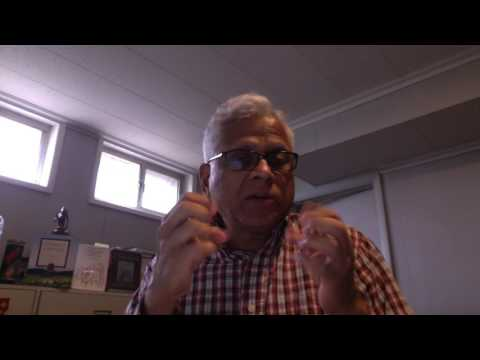

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('NSo-yUsv5LA')

# Practical Motivations: Robust Parsing

Humans cannot exist in this intellectual society without having the means for unambiguous communication. Unless they can use symbols to write down things and have full confidence that another human or computer will understand it exactly as intended, things can go horribly wrong. For example, if we write down an expression of the form 3 \* 4 + 5 \* 6, something tells us that it was intended to communicate 42 (i.e. (3\*4)+(5\*6)) and not 360 (if we calculate it as 3\*(4+5)\*6). Yet, such obvious precedence rules (that \* carries more precedence than +) that are known by elementary school children are not "known" to a computer. We must explicitly instruct computer front-end parsers to calculate such expressions obeying the right precedences. Yet, the discovery of operator-precedence parsing wasn't easy. Early compilers had extremely hairy rules for parsing even such expressions.  They for instance replaced '+' by ")))+(((", '*' by "))*((", etc. The resulting complexity and impenetrability of early compilers is covered in a historic paper entitled "History of writing compilers" by [Knuth][KnuthCompilerHistory].  

The design of modern formal languages -- whether they be programming languages, scripting languages or even regular-expression specification languages -- is really a marvel of human ingenuity. This point comes up again in [Padua's LCPC 2014 conference keynote][padualcpc] where it is made clear how Fortran compilers dealt with expressions such as (2 \* (3 + 4) - (8 - 7)) in entirely ad-hoc ways, as they did not have a formal understanding of operator precedence and context-free parsing. 


Even if reliable parsing is available, it must be guaranteed that just forgetting a "," (comma) somewhere must not result in a legal program with an entirely different meaning; yet, historically this has happened!

## Lost Comma results in Lost Spacecraft 

The syntax of an early computer languaged -- notably Fortran -- proved too brittle, not lending itself to easy error correction. Here is an eye-opening story, supposedly from Mariner-1 (although there is some controversy on whether this story is entirely true -- see [Wikipedia on Mariner][mariner] -- it is a good story!). Apparently this spacecraft was lost because someone forgot to type a comma!  How so?

Here was the intended loop:

> The loop that faulted was intended to be something like
> 

> DO 10 I = 1,100

> ...loop body...

> 10 CONTINUE

However, someone did not type a comma after the I = 1 and the code looked like this:

> DO 10 I = 1 100

> 10 CONTINUE


Now, in Fortran, blanks are not significant, and so the "DO" statement without the comman becomes

> DO10I = 1100
> 

i.e., a fresh variable DO10I gets assigned 1100. Then the loop body executes once. Finally, the "10 CONTINUE" serves as a no op. The result is that the loop body is executed exact once, and not 100 times as was intended!!

## Please do not "Wing" Scanners and Parsers

The challenge of writing reliable (correct) scanners and parsers arises in a number of other contexts besides parsing programs. A Unix command of the form 'rm file\[0-1\]\[0-1\]\[0-1\]\*' must remove files ending in two or more occurrences of \[0-1\], and not remove a file named file0; recognizing this needs a regular-expression parser (otherwise known as a *scanner*). Another practical example of regular language parsing is in [deep packet inspection systems][deeppkt] that help filter out spam traveling at high speeds (e.g., 10 Gbps). In this case, scanning must be correct *and* extremely fast. Writing fast scanners is still a hot research topic as evidenced by recent papers in prestigious conferences (e.g., by [Mytkowicz et al.][MadanParallelFSM]). The Micron company sells chips implementing fast scanning, in the form of the [Micron Automaton Processor!][MicronAutomatonProcessor].

All these stories tell us that significant progress was achieved in the 20th centry (around the 1960s) in terms of  theories of Regular Languages and Context-Free Languages. These theories underlie our ability to *unambiguously parse* sentences belonging to *formal languages*. These developments form centerpieces of this course where, thanks to these innovations, we can teach these topics in a nice and convenient way using Jupyter notebooks to today's undergraduates!


[MicronAutomatonProcessor]: http://www.micronautomata.com/

[MadanParallelFSM]: https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/asplos302-mytkowicz.pdf

[KnuthCompilerHistory]: http://dl.acm.org/citation.cfm?id=806098

[padualcpc]:  https://parasol.tamu.edu/lcpc2014/keynote-padua.pdf


[mariner]: https://en.wikipedia.org/wiki/Mariner_1

[deeppkt]: http://ieeexplore.ieee.org/xpl/login.jsp?tp=&arnumber=6847977&url=http%3A%2F%2Fieeexplore.ieee.org%2Fxpls%2Fabs_all.jsp%3Farnumber%3D6847977